In [169]:
##packages 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

# EDA

In [170]:
## 
df=pd.read_csv('C:\\Users\pc\\Desktop\\Optimize Marketing Campaigns\\Campaign-Data.csv')
df.head(10)

,Client ID,Client Type,Number of Customers,Montly Target,Zip Code,Calendardate,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Number of Competition
0,ID-987275,Medium Facility,2800,125,1003,16-01-2014,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
1,ID-987275,Medium Facility,2800,125,1003,16-02-2014,3409460,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,322500.0,Low
2,ID-987275,Medium Facility,2800,125,1003,18-03-2014,10228384,75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
3,ID-987275,Medium Facility,2800,125,1003,18-04-2014,17047304,123,0.0,0.0,0.0,0.0,3547500.0,1290000.0,0.0,0.0,Low
4,ID-987275,Medium Facility,2800,125,1003,19-05-2014,23866224,171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
5,ID-987275,Medium Facility,2800,125,1003,16-06-2014,27275684,198,0.0,0.0,0.0,0.0,4515000.0,322500.0,0.0,0.0,Low
6,ID-987275,Medium Facility,2800,125,1003,17-07-2014,17047304,123,0.0,0.0,0.0,0.0,4515000.0,2580000.0,0.0,0.0,Low
7,ID-987275,Medium Facility,2800,125,1003,16-08-2014,17047304,123,0.0,696213.0,0.0,0.0,3547500.0,3547500.0,0.0,0.0,Low
8,ID-987275,Medium Facility,2800,125,1003,16-09-2014,17047304,123,383800.8,1290412.8,0.0,0.0,2580000.0,4192500.0,0.0,0.0,Low
9,ID-987275,Medium Facility,2800,125,1003,16-10-2014,27275684,198,0.0,664917.6,0.0,0.0,2580000.0,4515000.0,0.0,0.0,Low


In [171]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Client ID              2976 non-null   object 
 1   Client Type            2976 non-null   object 
 2   Number of Customers    2976 non-null   int64  
 3   Montly Target          2976 non-null   int64  
 4   Zip Code               2976 non-null   int64  
 5   Calendardate           2976 non-null   object 
 6   Amount Collected       2976 non-null   int64  
 7   Unit Sold              2976 non-null   int64  
 8   Campaign (Email)       2976 non-null   float64
 9   Campaign (Flyer)       2976 non-null   float64
 10  Campaign (Phone)       2976 non-null   float64
 11  Sales Contact 1        2976 non-null   float64
 12  Sales Contact 2        2976 non-null   float64
 13  Sales Contact 3        2976 non-null   float64
 14  Sales Contact 4        2976 non-null   float64
 15  Sale

(2976, 17)

In [172]:
df.describe()

,Number of Customers,Montly Target,Zip Code,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5
count,2976.000000,2976.000000,2976.0,2.976000e+03,2976.000000,2.976000e+03,2.976000e+03,2.976000e+03,2.976000e+03,2.976000e+03,2.976000e+03,2.976000e+03,2.976000e+03
mean,1456.935484,75.080645,1003.0,1.700440e+07,121.464718,1.432850e+05,6.854186e+05,2.977743e+04,1.313407e+05,2.023319e+06,1.867487e+06,7.076361e+04,1.462954e+04
std,1669.848734,87.042114,0.0,3.025803e+07,216.413984,7.230452e+05,1.727587e+06,3.832134e+05,1.034882e+06,3.396991e+06,3.271349e+06,3.869872e+05,8.905955e+04
min,0.000000,5.000000,1003.0,-2.216150e+07,-63.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,240.000000,10.000000,1003.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,960.000000,47.500000,1003.0,3.409460e+06,24.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.450000e+05,3.225000e+05,0.000000e+00,0.000000e+00
75%,2090.000000,101.250000,1003.0,2.045676e+07,147.000000,0.000000e+00,8.148285e+04,0.000000e+00,0.000000e+00,2.580000e+06,2.580000e+06,0.000000e+00,0.000000e+00
max,9840.000000,510.000000,1003.0,2.079771e+08,1500.000000,1.144673e+07,1.359395e+07,9.617380e+06,2.902500e+07,3.063750e+07,2.612250e+07,4.837500e+06,1.612500e+06


In [173]:
df.columns

Index(['Client ID', 'Client Type', 'Number of Customers', 'Montly Target',
       'Zip Code', 'Calendardate', 'Amount Collected', 'Unit Sold',
       'Campaign (Email)', 'Campaign (Flyer)', 'Campaign (Phone)',
       'Sales Contact 1', 'Sales Contact 2', 'Sales Contact 3',
       'Sales Contact 4', 'Sales Contact 5', 'Number of Competition'],
      dtype='object')

In [174]:
df.isna().sum()

Client ID                0
Client Type              0
Number of Customers      0
Montly Target            0
Zip Code                 0
Calendardate             0
Amount Collected         0
Unit Sold                0
Campaign (Email)         0
Campaign (Flyer)         0
Campaign (Phone)         0
Sales Contact 1          0
Sales Contact 2          0
Sales Contact 3          0
Sales Contact 4          0
Sales Contact 5          0
Number of Competition    0
dtype: int64

In [175]:
## making Calendardate as time and then splitting into year and month 
df['Calendardate']=pd.to_datetime(df['Calendardate'])
df['Calendar_Month']=df['Calendardate'].dt.month
df['Calendar_Year']=df['Calendardate'].dt.year

In [176]:
df.head(10)

,Client ID,Client Type,Number of Customers,Montly Target,Zip Code,Calendardate,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Number of Competition,Calendar_Month,Calendar_Year
0,ID-987275,Medium Facility,2800,125,1003,2014-01-16,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,1,2014
1,ID-987275,Medium Facility,2800,125,1003,2014-02-16,3409460,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,322500.0,Low,2,2014
2,ID-987275,Medium Facility,2800,125,1003,2014-03-18,10228384,75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,3,2014
3,ID-987275,Medium Facility,2800,125,1003,2014-04-18,17047304,123,0.0,0.0,0.0,0.0,3547500.0,1290000.0,0.0,0.0,Low,4,2014
4,ID-987275,Medium Facility,2800,125,1003,2014-05-19,23866224,171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,5,2014
5,ID-987275,Medium Facility,2800,125,1003,2014-06-16,27275684,198,0.0,0.0,0.0,0.0,4515000.0,322500.0,0.0,0.0,Low,6,2014
6,ID-987275,Medium Facility,2800,125,1003,2014-07-17,17047304,123,0.0,0.0,0.0,0.0,4515000.0,2580000.0,0.0,0.0,Low,7,2014
7,ID-987275,Medium Facility,2800,125,1003,2014-08-16,17047304,123,0.0,696213.0,0.0,0.0,3547500.0,3547500.0,0.0,0.0,Low,8,2014
8,ID-987275,Medium Facility,2800,125,1003,2014-09-16,17047304,123,383800.8,1290412.8,0.0,0.0,2580000.0,4192500.0,0.0,0.0,Low,9,2014
9,ID-987275,Medium Facility,2800,125,1003,2014-10-16,27275684,198,0.0,664917.6,0.0,0.0,2580000.0,4515000.0,0.0,0.0,Low,10,2014


In [177]:
## looking for the correlation 
df.corr(numeric_only = True)

,Number of Customers,Montly Target,Zip Code,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Calendar_Month,Calendar_Year
Number of Customers,1.000000e+00,9.755652e-01,NaN,0.607496,0.607433,0.308829,0.392804,0.034045,0.306494,0.603382,0.526118,0.139936,0.160106,-2.525610e-16,2.651324e-14
Montly Target,9.755652e-01,1.000000e+00,NaN,0.608204,0.608205,0.303715,0.392718,0.033320,0.303154,0.606399,0.523733,0.142446,0.156679,-1.943609e-16,7.797249e-14
Zip Code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount Collected,6.074959e-01,6.082040e-01,NaN,1.000000,0.997515,0.248235,0.444337,0.034858,0.277478,0.552112,0.357887,0.236165,0.095795,1.394255e-01,2.861939e-01
Unit Sold,6.074333e-01,6.082052e-01,NaN,0.997515,1.000000,0.248654,0.448744,0.035318,0.275878,0.555373,0.356736,0.232857,0.095808,1.397321e-01,2.891124e-01
Campaign (Email),3.088290e-01,3.037153e-01,NaN,0.248235,0.248654,1.000000,0.193791,0.014099,0.266377,0.236874,0.178171,0.079366,0.071325,4.262989e-02,7.054998e-03
Campaign (Flyer),3.928040e-01,3.927179e-01,NaN,0.444337,0.448744,0.193791,1.000000,0.006191,0.172554,0.349145,0.290652,0.056381,0.092728,1.549005e-01,1.207313e-01
Campaign (Phone),3.404528e-02,3.332045e-02,NaN,0.034858,0.035318,0.014099,0.006191,1.000000,0.081151,0.002027,0.073234,0.008415,0.015859,-3.824878e-02,5.484606e-02
Sales Contact 1,3.064945e-01,3.031538e-01,NaN,0.277478,0.275878,0.266377,0.172554,0.081151,1.000000,0.173196,-0.008739,0.184894,0.014422,-2.160138e-02,7.603533e-02
Sales Contact 2,6.033817e-01,6.063986e-01,NaN,0.552112,0.555373,0.236874,0.349145,0.002027,0.173196,1.000000,0.109824,0.135447,0.072573,1.343470e-01,1.562448e-01


In [178]:
## looking for the correlation 

df.corr(numeric_only = True)['Amount Collected']

Number of Customers    0.607496
Montly Target          0.608204
Zip Code                    NaN
Amount Collected       1.000000
Unit Sold              0.997515
Campaign (Email)       0.248235
Campaign (Flyer)       0.444337
Campaign (Phone)       0.034858
Sales Contact 1        0.277478
Sales Contact 2        0.552112
Sales Contact 3        0.357887
Sales Contact 4        0.236165
Sales Contact 5        0.095795
Calendar_Month         0.139425
Calendar_Year          0.286194
Name: Amount Collected, dtype: float64

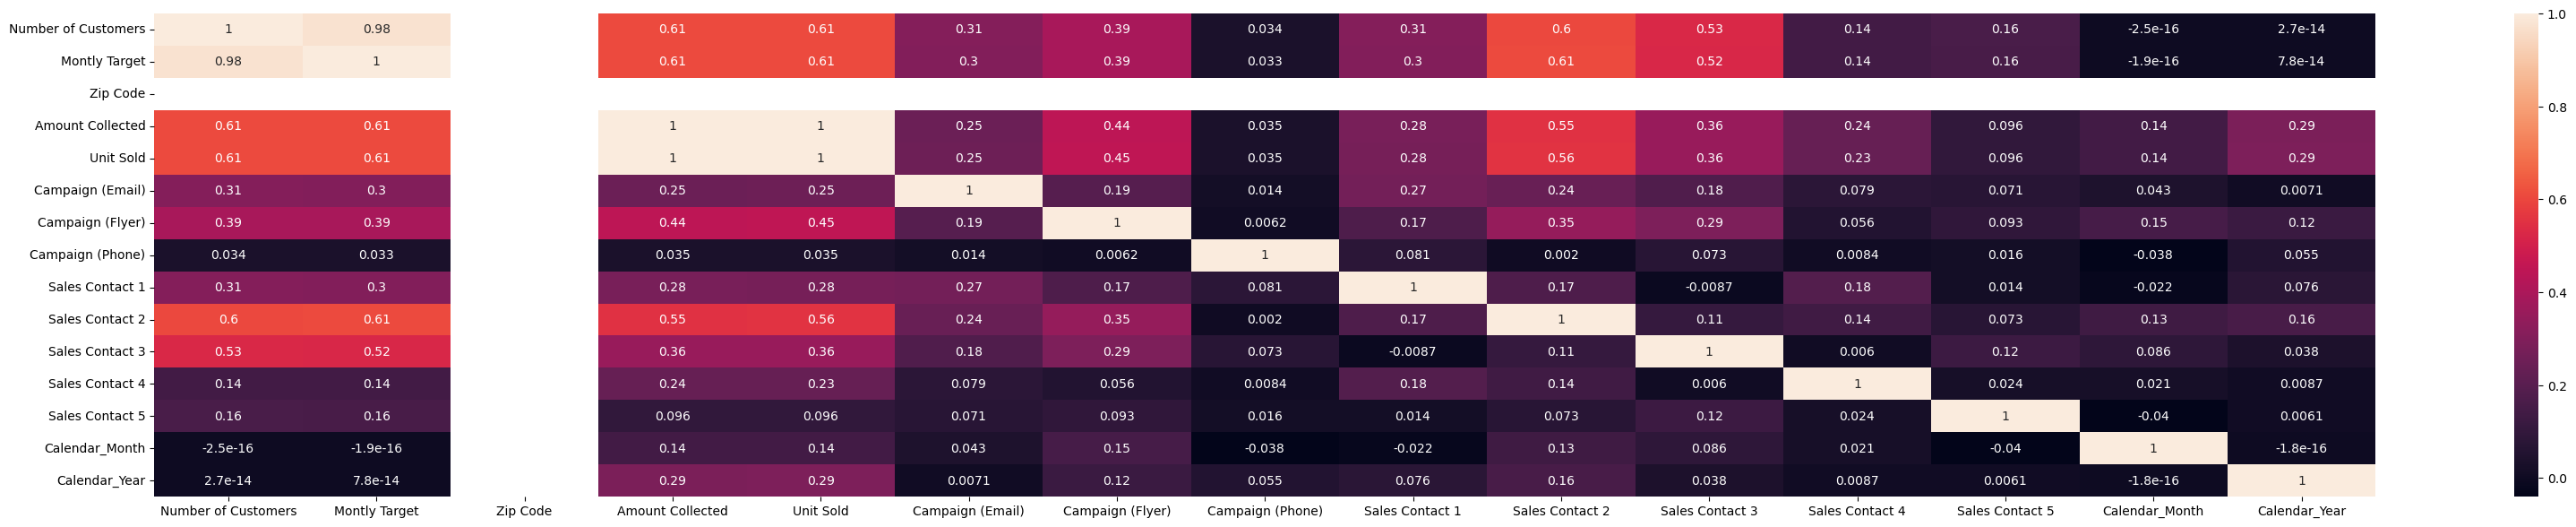

In [179]:
### lets visaulize the correlation
sns.heatmap(df.corr(numeric_only=True), annot = True)
plt.rcParams['figure.figsize'] = (40,7)

plt.show()


In [180]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
)

SyntaxError: unmatched ')' (2285476937.py, line 12)

In [ ]:
X = df.select_dtypes(include=np.number)
calc_vif(X)
### afrer compute the vif we see that thereis no multicollinearity

In [ ]:
### identify our indep and dep variables in case of the full model 
X = df.drop(columns=['Amount Collected'], axis=1).select_dtypes(include=np.number)
Y = df['Amount Collected']
## splitting the data into train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)
# loading the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

In [181]:
# Model summary
X_train = sm.add_constant(X_train)  # Add a constant for the intercept
model = sm.OLS(Y_train, X_train).fit()

# Get the summary
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:       Amount Collected   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.427e+05
Date:                Fri, 23 Feb 2024   Prob (F-statistic):               0.00
Time:                        19:35:27   Log-Likelihood:                -32745.
No. Observations:                2083   AIC:                         6.550e+04
Df Residuals:                    2077   BIC:                         6.554e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.165e+04   4

In [182]:
###backward step wise 
import statsmodels.api as sm

def backward_stepwise_selection(X, Y):
    selected_features = list(X.columns)
    while True:
        x_selected = X[selected_features]
        model = sm.OLS(Y, sm.add_constant(x_selected)).fit()
        pvalues = model.pvalues[1:]  # Exclude the constant term
        max_pvalue = pvalues.max()
        if max_pvalue > 0.05:  # Stopping criterion (adjust as needed)
            remove_feature = pvalues.idxmax()
            selected_features.remove(remove_feature)
        else:
            break
    return selected_features, model

selected_features, final_model = backward_stepwise_selection(X,Y)
print("Selected features:", selected_features)
print(final_model.summary())

Selected features: ['Number of Customers', 'Unit Sold', 'Campaign (Flyer)', 'Sales Contact 2', 'Sales Contact 4']
                            OLS Regression Results                            
Dep. Variable:       Amount Collected   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.201e+05
Date:                Fri, 23 Feb 2024   Prob (F-statistic):               0.00
Time:                        19:35:28   Log-Likelihood:                -47577.
No. Observations:                2976   AIC:                         9.517e+04
Df Residuals:                    2970   BIC:                         9.520e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------

In [183]:
### our perdictive model in case of the backward step wise
regressor = LinearRegression()
X=df[['Number of Customers', 'Unit Sold', 'Campaign (Flyer)','Sales Contact 2','Sales Contact 4']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
# loading the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, Y_train)


LinearRegression()

In [184]:
input_data = (31,500,2,40,5000)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The Amount Collected ', prediction[0])

[69869700.8950586]
The Amount Collected  69869700.8950586


# if our goal was to perdict which model are the best to represent the data or building a perdicitve model isuppose that it have been done buth there is another assesment, Market Strategy Impact on Sales (Broken by different account type)

In [185]:
#  Strategy Impact on Sales
## Consolidated Strategy for Targeting and removing some unnecessary variables 
cm = sns.light_palette("green", as_cmap=True)
correlation_analysis=pd.DataFrame(df[['Amount Collected',
'Campaign (Email)', 'Campaign (Flyer)', 'Campaign (Phone)',
       'Sales Contact 1', 'Sales Contact 2', 'Sales Contact 3',
       'Sales Contact 4', 'Sales Contact 5']].corr()['Amount Collected']).reset_index()
correlation_analysis.columns=['Impacting Variable','Degree of Linear Impact (Correlation)']
correlation_analysis=correlation_analysis[correlation_analysis['Impacting Variable']!='Amount Collected']
correlation_analysis=correlation_analysis.sort_values('Degree of Linear Impact (Correlation)',ascending=False)
correlation_analysis.style.background_gradient(cmap=cm)

,Impacting Variable,Degree of Linear Impact (Correlation)
5,Sales Contact 2,0.552112
2,Campaign (Flyer),0.444337
6,Sales Contact 3,0.357887
4,Sales Contact 1,0.277478
1,Campaign (Email),0.248235
7,Sales Contact 4,0.236165
8,Sales Contact 5,0.095795
3,Campaign (Phone),0.034858


In [186]:
cm = sns.light_palette("green", as_cmap=True)
correlation_analysis=pd.DataFrame(df.groupby('Client Type')[['Amount Collected',
       'Campaign (Email)', 'Campaign (Flyer)', 'Campaign (Phone)',
       'Sales Contact 1', 'Sales Contact 2', 'Sales Contact 3',
       'Sales Contact 4', 'Sales Contact 5']].corr()['Amount Collected']).reset_index()
correlation_analysis=correlation_analysis.sort_values(['Client Type','Amount Collected'],ascending=False)
correlation_analysis.columns=['Acc Type','Variable Impact on Sales','Impact']
correlation_analysis=correlation_analysis[correlation_analysis['Variable Impact on Sales']!='Amount Collected'].reset_index(drop=True)
correlation_analysis.style.background_gradient(cmap=cm)

,Acc Type,Variable Impact on Sales,Impact
0,Small Facility,Sales Contact 2,0.219759
1,Small Facility,Sales Contact 3,0.068269
2,Small Facility,Campaign (Email),0.060200
3,Small Facility,Campaign (Flyer),0.040600
4,Small Facility,Sales Contact 4,0.024401
5,Small Facility,Sales Contact 5,0.000927
6,Small Facility,Sales Contact 1,-0.015594
7,Small Facility,Campaign (Phone),nan
8,Private Facility,Sales Contact 2,0.574481
9,Private Facility,Campaign (Flyer),0.280098


In [187]:
## building a column 
df.columns=[mystring.replace(" ", "_") for mystring in df.columns]
df.columns=[mystring.replace("(", "") for mystring in df.columns]
df.columns=[mystring.replace(")", "") for mystring in df.columns]
results = smf.ols('Amount_Collected ~ Campaign_Email+Campaign_Flyer+Campaign_Phone+\
       Sales_Contact_1 + Sales_Contact_2 + Sales_Contact_3+Sales_Contact_4 + Sales_Contact_5',data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Amount_Collected   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     342.1
Date:                Fri, 23 Feb 2024   Prob (F-statistic):               0.00
Time:                        19:35:30   Log-Likelihood:                -54512.
No. Observations:                2976   AIC:                         1.090e+05
Df Residuals:                    2967   BIC:                         1.091e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.481e+06   5.12e+05     